# 공공데이터 이용한 데이터 분석(2)

## 교육부_유초중등교육기관 학생 및 교원수 현황

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns

In [79]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

plt.rc('font', family="Malgun Gothic")
plt.rc('axes', unicode_minus = False)

set_matplotlib_formats('retina')

%matplotlib inline

### 1. 데이터 불러오기

In [80]:
df = pd.read_csv("C:/Users/eunji/교육부_유초중등교육기관 학생 및 교원수 현황_20190927.csv", encoding="euc-kr")

In [123]:
df

,시도,학교급,학교수,학급수_계,1학년_학급수,2학년_학급수,3학년_학급수,4학년_학급수,5학년_학급수,6학년_학급수,...,3학년_학생수_여,학급당 학생수,다문화 학생수,교원수_총계_계,교원수_총계_여,교원수_정규교원_계,교원수_정규교원_여,교원수_기간제교원_계,교원수_기간제교원_여,교원1인당 학생수
0,서울,유치원,876,4365,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,19.5,0,6958,6877,6834,6753,124,124,12.2
1,서울,초등학교,603,18585,3034.0,3010.0,2990.0,3030.0,3220.0,3301.0,...,32802.0,22.9,11940,28992,25201,28445,24728,547,473,14.7
2,서울,중학교,385,8855,2842.0,2941.0,3072.0,0.0,0.0,0.0,...,36500.0,24.4,2701,17743,12524,14907,10384,2836,2140,12.2
3,서울,고등학교,188,6059,1968.0,1980.0,2111.0,0.0,0.0,0.0,...,32079.0,27.3,588,13374,7295,11086,5698,2288,1597,12.4
4,서울,고등학교,41,1273,417.0,419.0,437.0,0.0,0.0,0.0,...,4278.0,29.7,106,2791,1403,2304,1048,487,355,13.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,제주,고등학교,6,146,46.0,49.0,51.0,0.0,0.0,0.0,...,628.0,24.7,36,370,198,304,160,66,38,9.7
186,제주,고등학교,2,18,6.0,6.0,6.0,0.0,0.0,0.0,...,81.0,22.2,2,54,28,49,23,5,5,7.4
187,제주,특수학교,3,95,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.8,0,157,110,125,90,32,20,2.9
188,제주,방통중,1,6,2.0,2.0,2.0,0.0,0.0,0.0,...,33.0,21.5,0,0,0,0,0,0,0,0.0


#### ->encoding = "utf-8" 로 했는데 UnicodeError가 나서 "euc-kr"로 했더니 됌

In [82]:
df.shape

(190, 34)

In [83]:
df.head()

,시도,학교급,고등학교유형,학교수,학급수_계,1학년_학급수,2학년_학급수,3학년_학급수,4학년_학급수,5학년_학급수,...,6학년_학생수_여,학급당 학생수,다문화 학생수,교원수_총계_계,교원수_총계_여,교원수_정규교원_계,교원수_정규교원_여,교원수_기간제교원_계,교원수_기간제교원_여,교원1인당 학생수
0,서울,유치원,NaN,876,4365,NaN,NaN,NaN,NaN,NaN,...,NaN,19.5,0,6958,6877,6834,6753,124,124,12.2
1,서울,초등학교,NaN,603,18585,3034.0,3010.0,2990.0,3030.0,3220.0,...,33746.0,22.9,11940,28992,25201,28445,24728,547,473,14.7
2,서울,중학교,NaN,385,8855,2842.0,2941.0,3072.0,0.0,0.0,...,0.0,24.4,2701,17743,12524,14907,10384,2836,2140,12.2
3,서울,고등학교,일반고,188,6059,1968.0,1980.0,2111.0,0.0,0.0,...,0.0,27.3,588,13374,7295,11086,5698,2288,1597,12.4
4,서울,고등학교,자율고,41,1273,417.0,419.0,437.0,0.0,0.0,...,0.0,29.7,106,2791,1403,2304,1048,487,355,13.6


In [84]:
df.tail()

,시도,학교급,고등학교유형,학교수,학급수_계,1학년_학급수,2학년_학급수,3학년_학급수,4학년_학급수,5학년_학급수,...,6학년_학생수_여,학급당 학생수,다문화 학생수,교원수_총계_계,교원수_총계_여,교원수_정규교원_계,교원수_정규교원_여,교원수_기간제교원_계,교원수_기간제교원_여,교원1인당 학생수
185,제주,고등학교,특성화고,6,146,46.0,49.0,51.0,0.0,0.0,...,0.0,24.7,36,370,198,304,160,66,38,9.7
186,제주,고등학교,특수목적고,2,18,6.0,6.0,6.0,0.0,0.0,...,0.0,22.2,2,54,28,49,23,5,5,7.4
187,제주,특수학교,NaN,3,95,NaN,NaN,NaN,NaN,NaN,...,NaN,4.8,0,157,110,125,90,32,20,2.9
188,제주,방통중,NaN,1,6,2.0,2.0,2.0,0.0,0.0,...,0.0,21.5,0,0,0,0,0,0,0,0.0
189,제주,방통고,NaN,1,15,5.0,5.0,5.0,0.0,0.0,...,0.0,19.9,0,0,0,0,0,0,0,0.0


In [85]:
df.sample()

,시도,학교급,고등학교유형,학교수,학급수_계,1학년_학급수,2학년_학급수,3학년_학급수,4학년_학급수,5학년_학급수,...,6학년_학생수_여,학급당 학생수,다문화 학생수,교원수_총계_계,교원수_총계_여,교원수_정규교원_계,교원수_정규교원_여,교원수_기간제교원_계,교원수_기간제교원_여,교원1인당 학생수
98,경기,각종학교,NaN,10,93,NaN,NaN,NaN,NaN,NaN,...,NaN,21.0,38,162,103,123,76,39,27,12.0


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   시도           190 non-null    object 
 1   학교급          190 non-null    object 
 2   고등학교유형       67 non-null     object 
 3   학교수          190 non-null    int64  
 4   학급수_계        190 non-null    int64  
 5   1학년_학급수      142 non-null    float64
 6   2학년_학급수      142 non-null    float64
 7   3학년_학급수      142 non-null    float64
 8   4학년_학급수      142 non-null    float64
 9   5학년_학급수      142 non-null    float64
 10  6학년_학급수      142 non-null    float64
 11  학생수_총계_계     190 non-null    int64  
 12  학생수_총계_여     190 non-null    int64  
 13  1학년_학생수_계    142 non-null    float64
 14  1학년_학생수_여    142 non-null    float64
 15  2학년_학생수_계    142 non-null    float64
 16  2학년_학생수_여    142 non-null    float64
 17  3학년_학생수_계    142 non-null    float64
 18  3학년_학생수_여    142 non-null    float64
 19  4학년_학생수_

In [87]:
type(df.columns)

pandas.core.indexes.base.Index

In [88]:
df.columns

Index(['시도', '학교급', '고등학교유형', '학교수', '학급수_계', '1학년_학급수', '2학년_학급수', '3학년_학급수',
       '4학년_학급수', '5학년_학급수', '6학년_학급수', '학생수_총계_계', '학생수_총계_여', '1학년_학생수_계',
       '1학년_학생수_여', '2학년_학생수_계', '2학년_학생수_여', '3학년_학생수_계', '3학년_학생수_여',
       '4학년_학생수_계', '4학년_학생수_여', '5학년_학생수_계', '5학년_학생수_여', '6학년_학생수_계',
       '6학년_학생수_여', '학급당 학생수', ' 다문화 학생수 ', '교원수_총계_계', '교원수_총계_여',
       '교원수_정규교원_계', '교원수_정규교원_여', '교원수_기간제교원_계', '교원수_기간제교원_여', '교원1인당 학생수'],
      dtype='object')

In [89]:
df.dtypes

시도              object
학교급             object
고등학교유형          object
학교수              int64
학급수_계            int64
1학년_학급수        float64
2학년_학급수        float64
3학년_학급수        float64
4학년_학급수        float64
5학년_학급수        float64
6학년_학급수        float64
학생수_총계_계         int64
학생수_총계_여         int64
1학년_학생수_계      float64
1학년_학생수_여      float64
2학년_학생수_계      float64
2학년_학생수_여      float64
3학년_학생수_계      float64
3학년_학생수_여      float64
4학년_학생수_계      float64
4학년_학생수_여      float64
5학년_학생수_계      float64
5학년_학생수_여      float64
6학년_학생수_계      float64
6학년_학생수_여      float64
학급당 학생수        float64
 다문화 학생수         int64
교원수_총계_계         int64
교원수_총계_여         int64
교원수_정규교원_계       int64
교원수_정규교원_여       int64
교원수_기간제교원_계      int64
교원수_기간제교원_여      int64
교원1인당 학생수      float64
dtype: object

In [90]:
df['1학년_학급수'].median()     # 1학년 학급수 중간값 구하기

98.5

+ 특성화고의 1학년 학급수가 많아 중간값이 높게 나온 것으로 보임

In [91]:
df['학급당 학생수'].max()

40.0

In [92]:
df['1학년_학생수_계'].min()

0.0

In [93]:
df['고등학교유형'].count()

67

In [94]:
df['학교수'].count()

190

In [95]:
df.describe()

,학교수,학급수_계,1학년_학급수,2학년_학급수,3학년_학급수,4학년_학급수,5학년_학급수,6학년_학급수,학생수_총계_계,학생수_총계_여,...,6학년_학생수_여,학급당 학생수,다문화 학생수,교원수_총계_계,교원수_총계_여,교원수_정규교원_계,교원수_정규교원_여,교원수_기간제교원_계,교원수_기간제교원_여,교원1인당 학생수
count,190.000000,190.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,190.000000,190.000000,...,142.000000,190.000000,190.000000,190.000000,190.0000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,110.352632,1452.710526,392.901408,400.204225,408.485915,141.345070,149.176056,147.936620,33209.068421,16040.147368,...,1474.985915,20.836842,643.221053,2611.910526,1853.0000,2348.873684,1669.873684,263.036842,183.126316,8.236316
std,242.135204,3240.016504,744.202284,757.910702,771.616731,548.269373,577.241180,573.131874,78596.721169,38224.035664,...,6120.139183,7.707216,2173.201755,5344.449298,4138.7461,4898.598705,3835.629575,565.945819,403.164303,6.422068
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,28.250000,7.250000,7.250000,8.000000,0.000000,0.000000,0.000000,568.000000,329.500000,...,0.000000,18.500000,0.000000,47.000000,24.0000,42.750000,21.000000,5.000000,3.000000,2.800000
50%,10.000000,270.500000,98.500000,98.500000,97.000000,0.000000,0.000000,0.000000,5490.000000,2011.000000,...,0.000000,22.650000,17.500000,557.000000,341.0000,479.000000,270.000000,76.500000,50.000000,9.900000
75%,108.250000,1642.750000,558.000000,562.000000,583.000000,0.000000,0.000000,0.000000,38839.500000,18988.750000,...,0.000000,26.375000,199.000000,3106.250000,2019.5000,2911.250000,1646.750000,240.250000,177.250000,12.000000
max,2275.000000,30119.000000,5033.000000,4992.000000,4771.000000,4971.000000,5209.000000,5143.000000,752499.000000,366319.000000,...,58064.000000,40.000000,22183.000000,45201.000000,35974.0000,42102.000000,33575.000000,4171.000000,3040.000000,60.000000


+ unique() 함수: 중복값 제거하여 보여줌 -> '시도'에 뭐가 있는지 확인

In [96]:
df['시도'].unique()

array(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [97]:
df['시도'].head()

0    서울
1    서울
2    서울
3    서울
4    서울
Name: 시도, dtype: object

In [98]:
df['시도'].nunique()

17

In [99]:
df['시도'].value_counts()

경남    13
인천    12
서울    12
경기    12
부산    12
충남    12
광주    12
경북    11
전남    11
울산    11
충북    11
전북    11
강원    11
대구    11
대전    11
제주     9
세종     8
Name: 시도, dtype: int64

## 2. 데이터 시각화 (plot, seaborn)

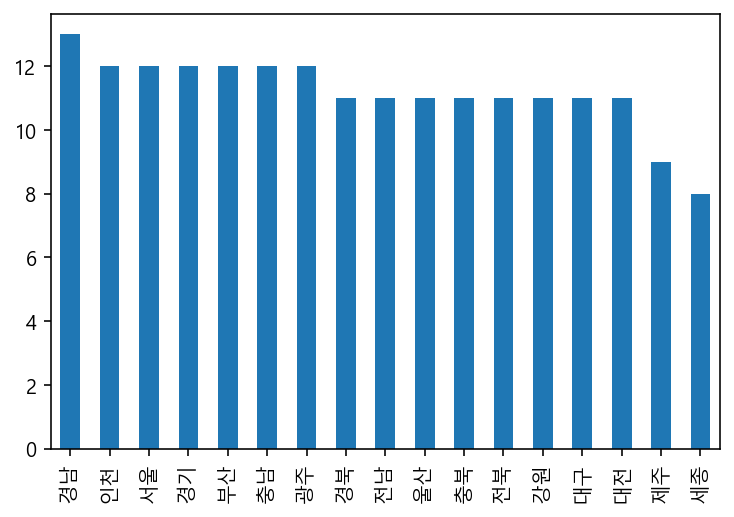

In [100]:
df['시도'].value_counts().plot.bar()

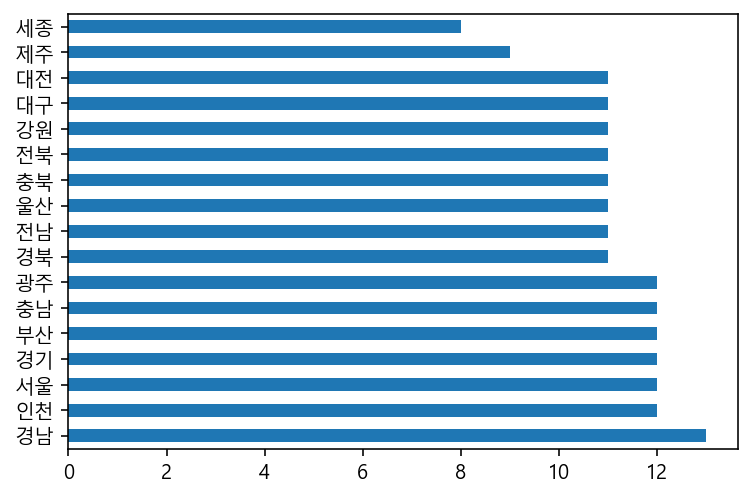

In [102]:
df['시도'].value_counts().plot.barh()

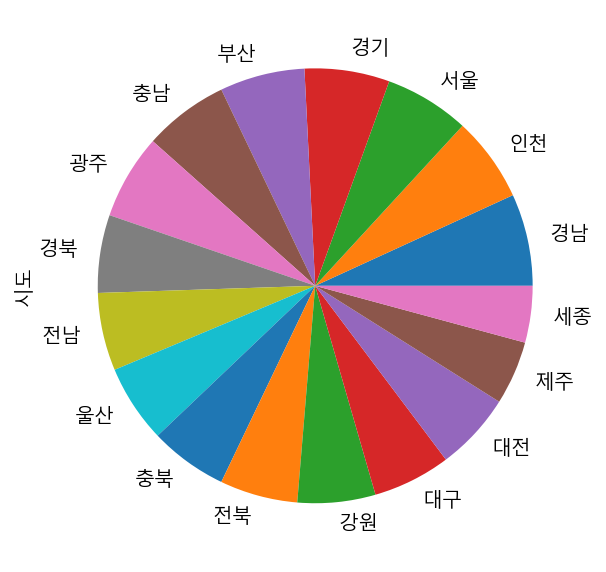

In [103]:
df['시도'].value_counts().plot.pie(figsize=(5,5))

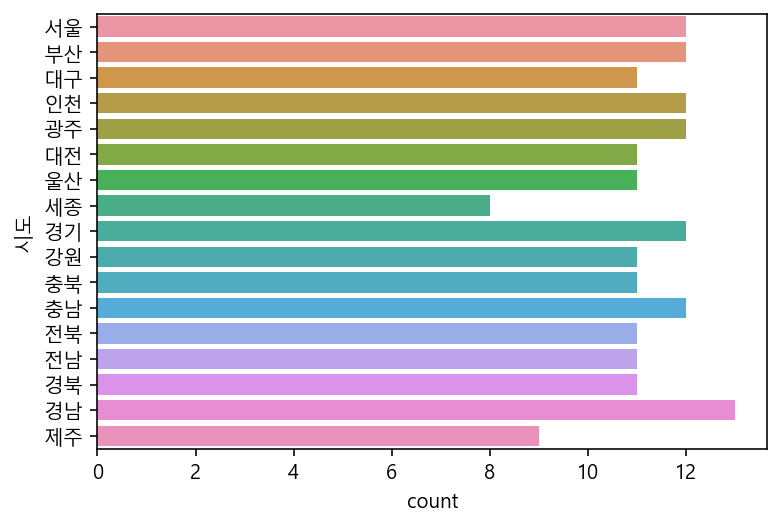

In [104]:
sns.countplot(data=df, y='시도')

## 3. 결측치 처리

In [105]:
df_null_count = df.isnull().sum()
df_null_count

시도               0
학교급              0
고등학교유형         123
학교수              0
학급수_계            0
1학년_학급수         48
2학년_학급수         48
3학년_학급수         48
4학년_학급수         48
5학년_학급수         48
6학년_학급수         48
학생수_총계_계         0
학생수_총계_여         0
1학년_학생수_계       48
1학년_학생수_여       48
2학년_학생수_계       48
2학년_학생수_여       48
3학년_학생수_계       48
3학년_학생수_여       48
4학년_학생수_계       48
4학년_학생수_여       48
5학년_학생수_계       48
5학년_학생수_여       48
6학년_학생수_계       48
6학년_학생수_여       48
학급당 학생수          0
 다문화 학생수         0
교원수_총계_계         0
교원수_총계_여         0
교원수_정규교원_계       0
교원수_정규교원_여       0
교원수_기간제교원_계      0
교원수_기간제교원_여      0
교원1인당 학생수        0
dtype: int64

In [106]:
df.isnull()

,시도,학교급,고등학교유형,학교수,학급수_계,1학년_학급수,2학년_학급수,3학년_학급수,4학년_학급수,5학년_학급수,...,6학년_학생수_여,학급당 학생수,다문화 학생수,교원수_총계_계,교원수_총계_여,교원수_정규교원_계,교원수_정규교원_여,교원수_기간제교원_계,교원수_기간제교원_여,교원1인당 학생수
0,False,False,True,False,False,True,True,True,True,True,...,True,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
186,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
187,False,False,True,False,False,True,True,True,True,True,...,True,False,False,False,False,False,False,False,False,False
188,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


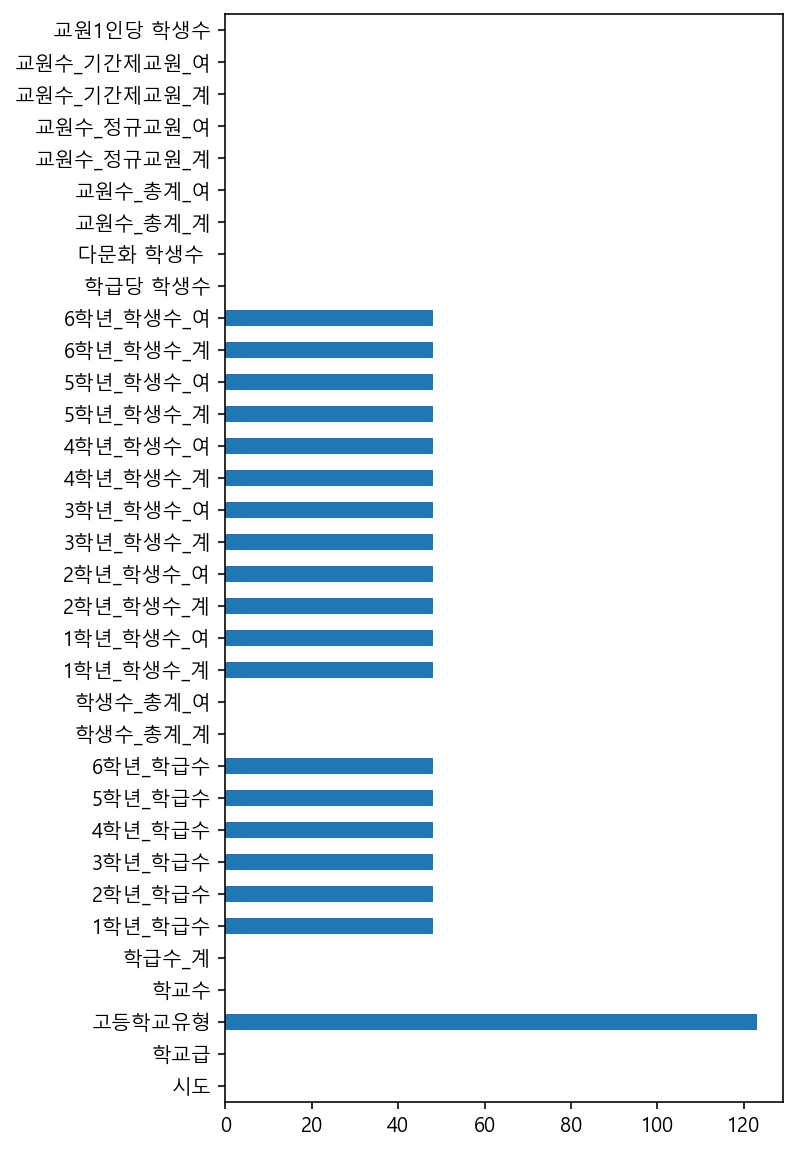

In [107]:
df_null_count.plot.barh(figsize=(5,10))

In [108]:
type(df_null_count)

pandas.core.series.Series

In [109]:
df_null_count = df_null_count.reset_index()

In [110]:
df_null_count

,index,0
0,시도,0
1,학교급,0
2,고등학교유형,123
3,학교수,0
4,학급수_계,0
5,1학년_학급수,48
6,2학년_학급수,48
7,3학년_학급수,48
8,4학년_학급수,48
9,5학년_학급수,48


In [111]:
df_null_count.columns = ['칼럼명', '결측치수']
df_null_count

,칼럼명,결측치수
0,시도,0
1,학교급,0
2,고등학교유형,123
3,학교수,0
4,학급수_계,0
5,1학년_학급수,48
6,2학년_학급수,48
7,3학년_학급수,48
8,4학년_학급수,48
9,5학년_학급수,48


In [112]:
df_null_count_sort = df_null_count.sort_values(by='결측치수',ascending=False)
df_null_count_sort

,칼럼명,결측치수
2,고등학교유형,123
17,3학년_학생수_계,48
14,1학년_학생수_여,48
24,6학년_학생수_여,48
23,6학년_학생수_계,48
22,5학년_학생수_여,48
21,5학년_학생수_계,48
20,4학년_학생수_여,48
19,4학년_학생수_계,48
18,3학년_학생수_여,48


In [113]:
df_null_count_sort = df_null_count_sort.head(9)
df_null_count_sort

,칼럼명,결측치수
2,고등학교유형,123
17,3학년_학생수_계,48
14,1학년_학생수_여,48
24,6학년_학생수_여,48
23,6학년_학생수_계,48
22,5학년_학생수_여,48
21,5학년_학생수_계,48
20,4학년_학생수_여,48
19,4학년_학생수_계,48


In [114]:
drop_colums = df_null_count_sort['칼럼명'].values
drop_colums

array(['고등학교유형', '3학년_학생수_계', '1학년_학생수_여', '6학년_학생수_여', '6학년_학생수_계',
       '5학년_학생수_여', '5학년_학생수_계', '4학년_학생수_여', '4학년_학생수_계'], dtype=object)

In [115]:
df[drop_colums].head()

,고등학교유형,3학년_학생수_계,1학년_학생수_여,6학년_학생수_여,6학년_학생수_계,5학년_학생수_여,5학년_학생수_계,4학년_학생수_여,4학년_학생수_계
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,67183.0,34348.0,33746.0,69857.0,36413.0,75057.0,34519.0,71251.0
2,NaN,76202.0,31835.0,0.0,0.0,0.0,0.0,0.0,0.0
3,일반고,64359.0,23920.0,0.0,0.0,0.0,0.0,0.0,0.0
4,자율고,13545.0,3637.0,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
df.shape

(190, 34)

In [117]:
df.drop(columns = drop_colums, inplace=True)

In [118]:
df.shape

(190, 25)

In [119]:
df.isnull().sum()

시도              0
학교급             0
학교수             0
학급수_계           0
1학년_학급수        48
2학년_학급수        48
3학년_학급수        48
4학년_학급수        48
5학년_학급수        48
6학년_학급수        48
학생수_총계_계        0
학생수_총계_여        0
1학년_학생수_계      48
2학년_학생수_계      48
2학년_학생수_여      48
3학년_학생수_여      48
학급당 학생수         0
 다문화 학생수        0
교원수_총계_계        0
교원수_총계_여        0
교원수_정규교원_계      0
교원수_정규교원_여      0
교원수_기간제교원_계     0
교원수_기간제교원_여     0
교원1인당 학생수       0
dtype: int64

In [125]:
ex_type = df['시도'] == '경기'
df_school = df[ex_type]
df_school

,시도,학교급,학교수,학급수_계,1학년_학급수,2학년_학급수,3학년_학급수,4학년_학급수,5학년_학급수,6학년_학급수,...,3학년_학생수_여,학급당 학생수,다문화 학생수,교원수_총계_계,교원수_총계_여,교원수_정규교원_계,교원수_정규교원_여,교원수_기간제교원_계,교원수_기간제교원_여,교원1인당 학생수
89,경기,유치원,2275,11112,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,17.1,0,14230,13989,13737,13503,493,486,13.3
90,경기,초등학교,1261,30119,5033.0,4992.0,4771.0,4971.0,5209.0,5143.0,...,58641.0,25.0,22183,45201,35974,42102,33575,3099,2399,16.6
91,경기,중학교,627,12369,3821.0,4141.0,4407.0,0.0,0.0,0.0,...,59983.0,29.0,4395,25680,19368,21509,16328,4171,3040,14.0
92,경기,고등학교,366,11659,3777.0,3808.0,4074.0,0.0,0.0,0.0,...,57680.0,27.5,1650,26403,16819,22504,14261,3899,2558,12.2
93,경기,고등학교,13,395,132.0,130.0,133.0,0.0,0.0,0.0,...,1936.0,27.6,21,889,511,798,463,91,48,12.3
94,경기,고등학교,75,2061,676.0,681.0,704.0,0.0,0.0,0.0,...,7484.0,23.9,739,4866,2606,4014,2086,852,520,10.1
95,경기,고등학교,20,455,151.0,151.0,153.0,0.0,0.0,0.0,...,2635.0,26.4,73,1088,548,970,473,118,75,11.0
96,경기,특수학교,35,878,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.4,0,1858,1263,1352,962,506,301,2.5
97,경기,고등공민학교,1,3,1.0,1.0,1.0,0.0,0.0,0.0,...,7.0,11.7,0,5,2,5,2,0,0,7.0
98,경기,각종학교,10,93,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,21.0,38,162,103,123,76,39,27,12.0
